In [1]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
import pandas as pd
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from sysquant.estimators.diversification_multipliers import diversification_mult_single_period
from sysquant.optimisation.weights import portfolioWeights
from syslogdiag.log_to_screen import logtoscreen

log = logtoscreen('csvFuturesSimData')
log.set_logging_level('close eye')
# data = csvFuturesSimData()
data =  csvFuturesSimData(csv_data_paths=dict(
            csvFuturesAdjustedPricesData='ctse.data.adjusted_prices_csv',
            csvFuturesMultiplePricesData='ctse.data.multiple_prices_csv',
            csvFuturesInstrumentData='ctse.data.csvconfig'
    ), log=log)
system = simplesystem(
    data,
    'paper.systems.china.yaml')

2022-11-21 17:09:38 {'type': 'base_system', 'stage': 'config'}  Adding config defaults
-301190.0


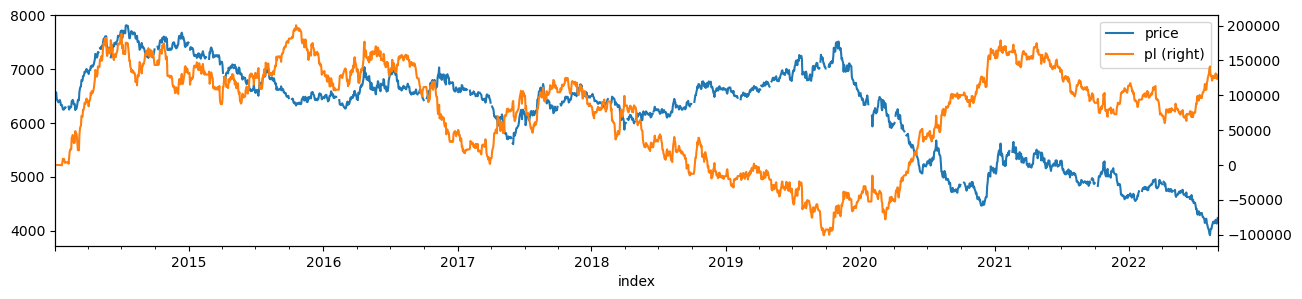

-200830.0


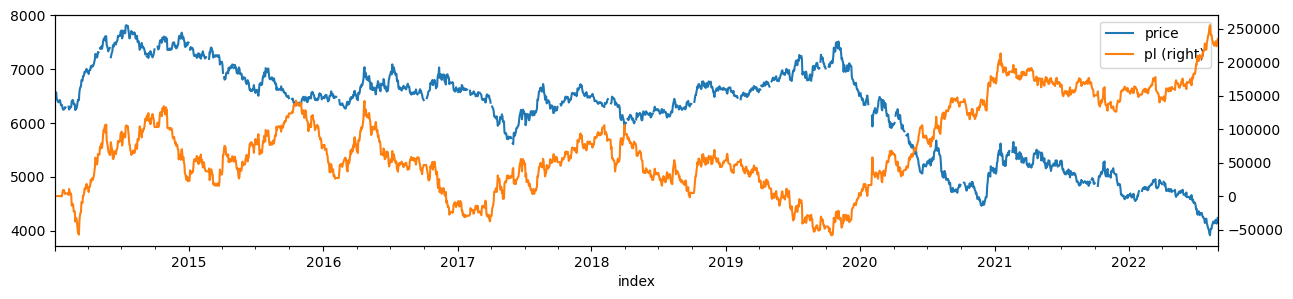

-254360.0


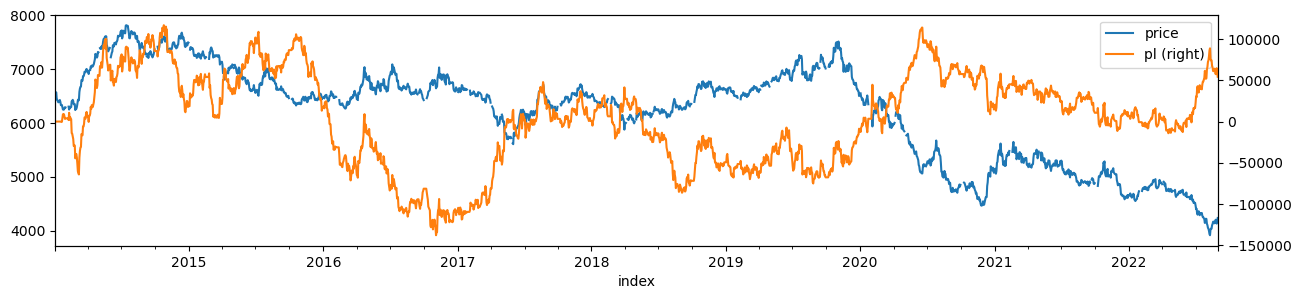

-171250.0


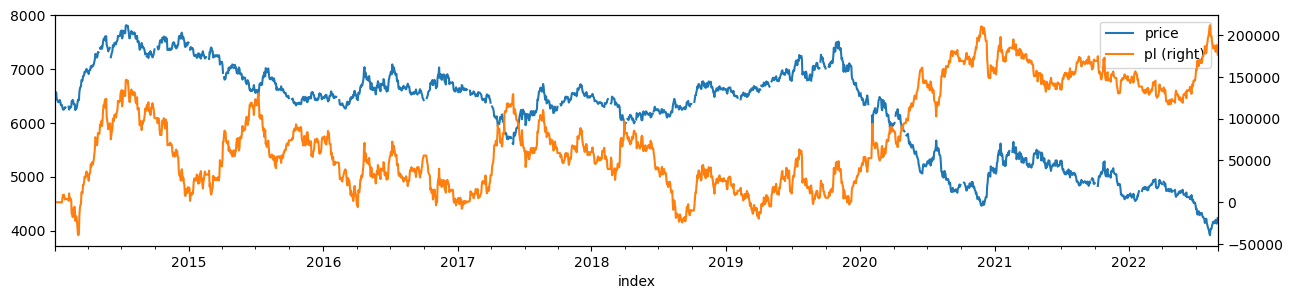

-165970.0


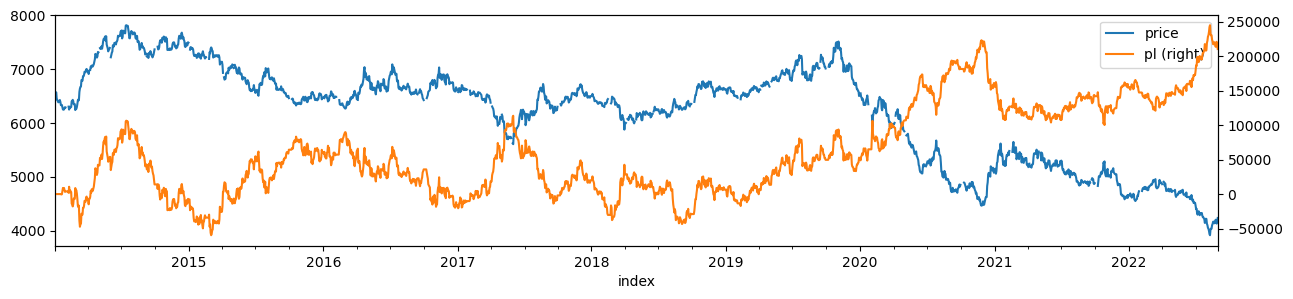

-168920.0


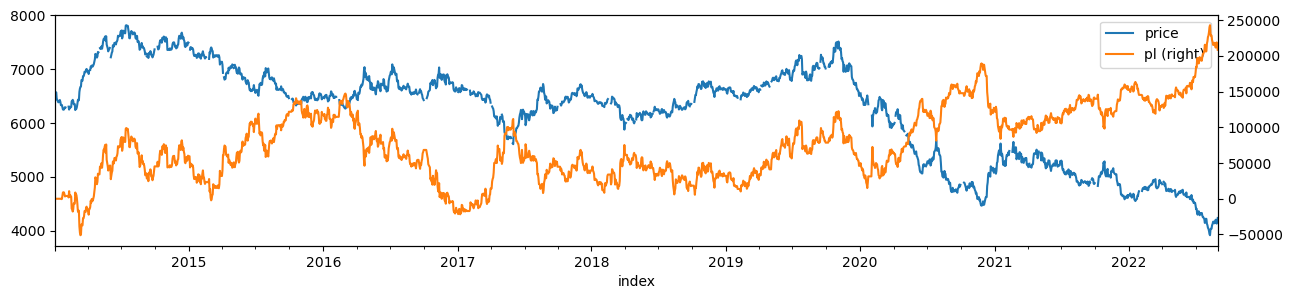

In [2]:
ins = 'JD'

for speed in [2, 4, 8, 16, 32, 64]:
    system = simplesystem(
        data,
        'paper.systems.china.yaml', log_level='close eye')
    system.config.trading_rules ={
        'ewmac': dict(function="paper.systems.rules.mac.ewmac", other_args=dict(Lfast=speed, Lslow=speed*4), forecast_scalar=1),
    }


    sd = '2002-01-01'
    ed = '2032-02-01'
    s1 = system.data.daily_prices(ins).rename('price')
    s1 = s1[(s1.index>=sd) & (s1.index<=ed)]
    s1.plot(figsize=(15,6), legend=True)

    s2 = system.accounts.pandl_for_instrument(ins).curve().rename('pl')
    s2 = s2[(s2.index>=sd) & (s2.index<=ed)]
    s2.plot(figsize=(15,3), legend=True, secondary_y=True)

    print(system.accounts.pandl_for_instrument(ins).worst_drawdown())

    plt.show()
    # s3 = system.portfolio.get_notional_position(ins).rename('notional')
    # s3 = s3[(s3.index>=sd) & (s3.index<=ed)]
    # s3.plot(figsize=(15,6), legend=True, secondary_y=True)

-221220.0


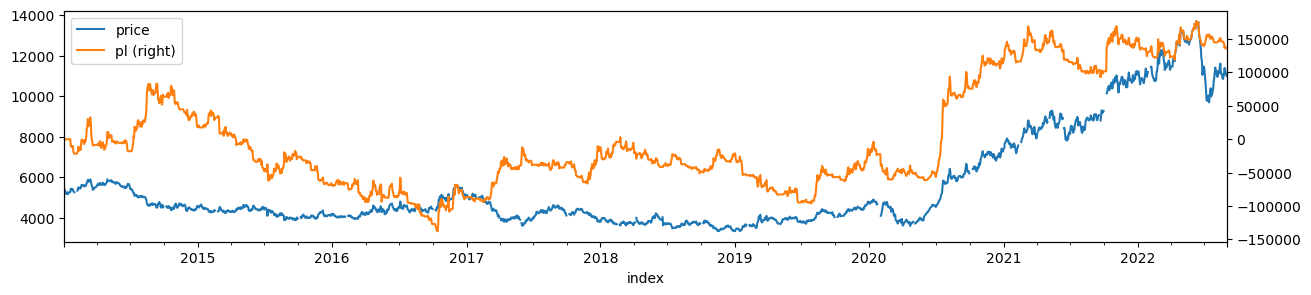

In [4]:
ins = 'OI'

system = simplesystem(
        data,
        'paper.systems.china.yaml', log_level='close eye')
rules = {}
forecast_weights = {}
for speed in [2, 4, 8, 16, 32, 64]:
    rules['ewmac{}'.format(speed)] = dict(function="paper.systems.rules.mac.ewmac", other_args=dict(Lfast=speed, Lslow=speed*4), forecast_scalar=1)
    forecast_weights['ewmac{}'.format(speed)] = 1 / 6
system.config.trading_rules = rules
system.config.forecast_weights = forecast_weights

sd = '2002-01-01'
ed = '2032-02-01'
s1 = system.data.daily_prices(ins).rename('price')
s1 = s1[(s1.index>=sd) & (s1.index<=ed)]
s1.plot(figsize=(15,6), legend=True)

s2 = system.accounts.pandl_for_instrument(ins).curve().rename('pl')
s2 = s2[(s2.index>=sd) & (s2.index<=ed)]
s2.plot(figsize=(15,3), legend=True, secondary_y=True)

plt.show()
print(system.accounts.pandl_for_instrument(ins).worst_drawdown())
# s3 = system.portfolio.get_notional_position(ins).rename('notional')
# s3 = s3[(s3.index>=sd) & (s3.index<=ed)]
# s3.plot(figsize=(15,6), legend=True, secondary_y=True)

# system.rawdata.get_daily_percentage_volatility(ins).plot(figsize=(15,6), legend=True)